Exploratory Analysis

In [0]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.feature_selection import RFE
import copy
from sklearn.ensemble import RandomForestClassifier

In [5]:
#importing data
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [6]:
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
#verifying if there are NaN values
for feature in data.columns:
    print(data[feature].isna().sum())

0
0
0
0
0
0
0
0
0
0
0
0


In [8]:
#verifying if there are null values
for feature in data.columns:
    print(data[feature].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0
0


In [9]:
#how many categories?
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [10]:
data['quality'].value_counts()
#There are more wines with quality 5.

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [0]:
#creating a new attribute: wines with quality >= 7 are "good", otherwise they are "not good"

In [0]:
binary = []

for i in range(0, len(data)):
    if data['quality'][i] >= 7:
        binary.append('good')
    else:
        binary.append('not good')
        
data['binary'] = binary

In [0]:
indicator = []
for i in range(0, len(data)):
    if data['binary'][i] == 'good':
        indicator.append(1)
    else:
        indicator.append(0)

data['indicator'] = indicator

In [17]:
data['binary'].value_counts()
#There are much more wines "not good" than "good".

not good    1382
good         217
Name: binary, dtype: int64

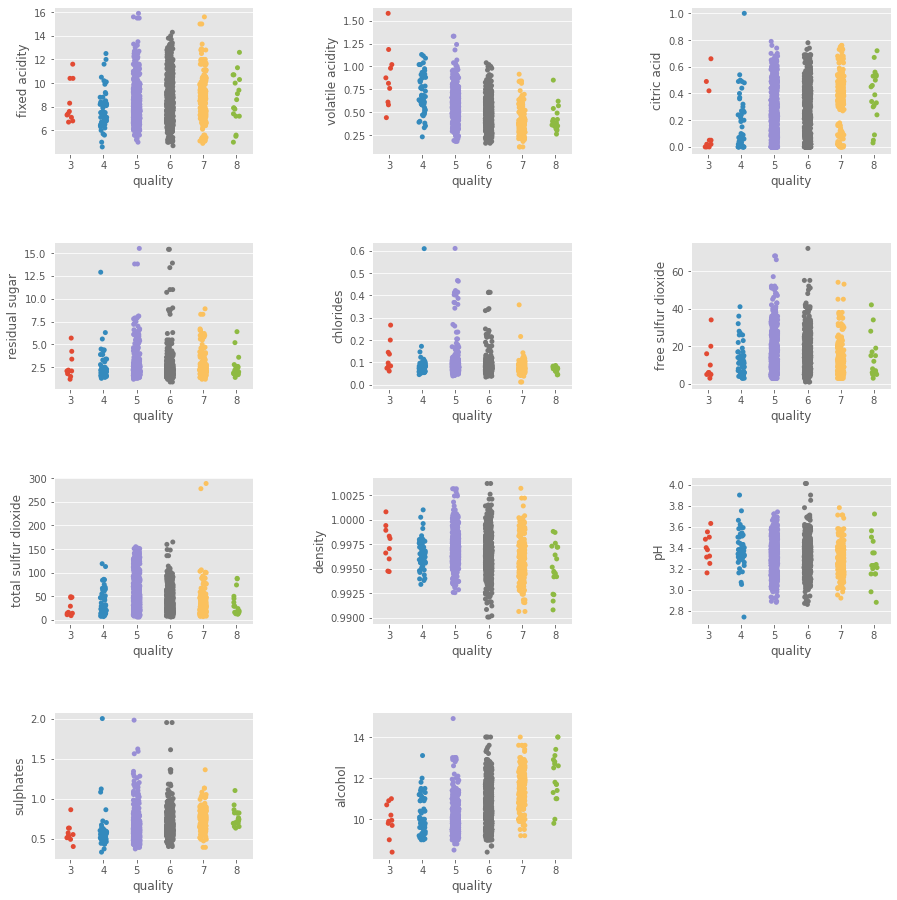

In [18]:
#visualizing the relationship between the target variable(quality) and each of the attributes
plt.style.use('ggplot')
fig = plt.figure(figsize=(15,20))
fig.subplots_adjust(hspace=0.6, wspace=0.6)
ax = fig.add_subplot(5, 3, 1)
sns.stripplot(data['quality'], data['fixed acidity'])
ax = fig.add_subplot(5, 3, 2)
sns.stripplot(data['quality'], data['volatile acidity'])
ax = fig.add_subplot(5, 3, 3)
sns.stripplot(data['quality'], data['citric acid'])
ax = fig.add_subplot(5, 3, 4)
sns.stripplot(data['quality'], data['residual sugar'])
ax = fig.add_subplot(5, 3, 5)
sns.stripplot(data['quality'], data['chlorides'])
ax = fig.add_subplot(5, 3, 6)
sns.stripplot(data['quality'], data['free sulfur dioxide'])
ax = fig.add_subplot(5, 3, 7)
sns.stripplot(data['quality'], data['total sulfur dioxide'])
ax = fig.add_subplot(5, 3, 8)
sns.stripplot(data['quality'], data['density'])
ax = fig.add_subplot(5, 3, 9)
sns.stripplot(data['quality'], data['pH'])
ax = fig.add_subplot(5, 3, 10)
sns.stripplot(data['quality'], data['sulphates'])
ax = fig.add_subplot(5, 3, 11)
sns.stripplot(data['quality'], data['alcohol'])
#It seems that the differences are more expressive for these attributes: 'volatile acidity',
#'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates' and 'alcohol'.

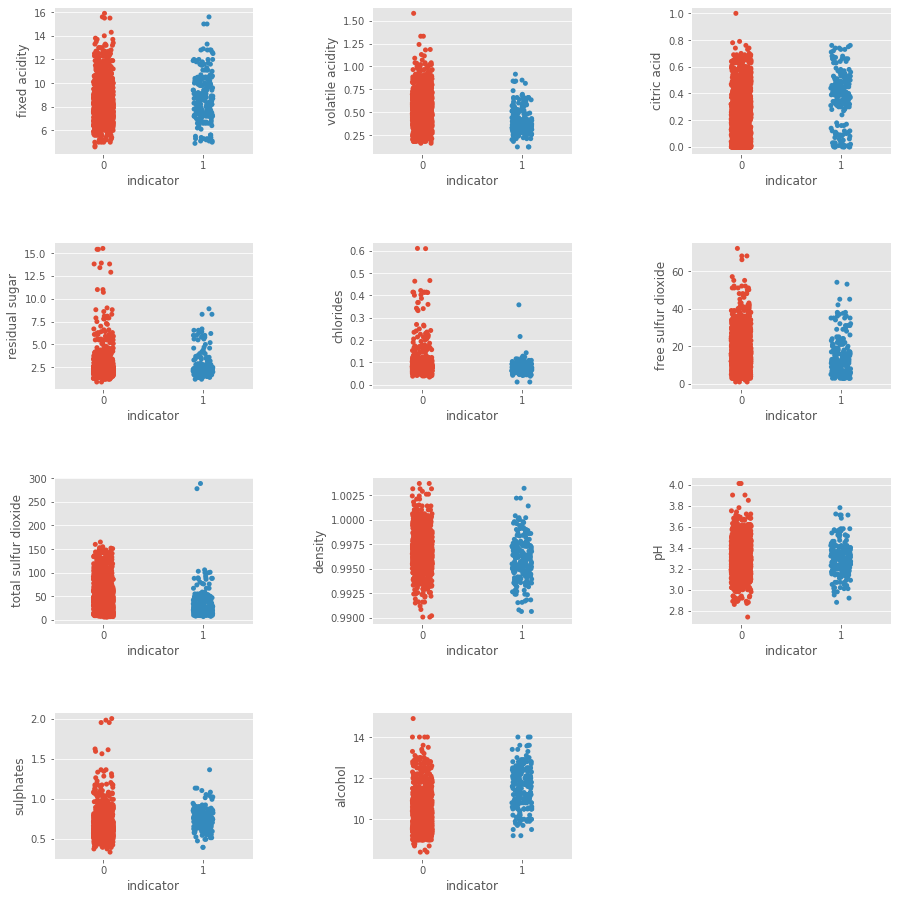

In [19]:
#visualizing the relationship between the target variable('good', 'not good') and each of the
#attributes
plt.style.use('ggplot')
fig = plt.figure(figsize=(15,20))
fig.subplots_adjust(hspace=0.6, wspace=0.6)
ax = fig.add_subplot(5, 3, 1)
sns.stripplot(data['indicator'], data['fixed acidity'])
ax = fig.add_subplot(5, 3, 2)
sns.stripplot(data['indicator'], data['volatile acidity'])
ax = fig.add_subplot(5, 3, 3)
sns.stripplot(data['indicator'], data['citric acid'])
ax = fig.add_subplot(5, 3, 4)
sns.stripplot(data['indicator'], data['residual sugar'])
ax = fig.add_subplot(5, 3, 5)
sns.stripplot(data['indicator'], data['chlorides'])
ax = fig.add_subplot(5, 3, 6)
sns.stripplot(data['indicator'], data['free sulfur dioxide'])
ax = fig.add_subplot(5, 3, 7)
sns.stripplot(data['indicator'], data['total sulfur dioxide'])
ax = fig.add_subplot(5, 3, 8)
sns.stripplot(data['indicator'], data['density'])
ax = fig.add_subplot(5, 3, 9)
sns.stripplot(data['indicator'], data['pH'])
ax = fig.add_subplot(5, 3, 10)
sns.stripplot(data['indicator'], data['sulphates'])
ax = fig.add_subplot(5, 3, 11)
sns.stripplot(data['indicator'], data['alcohol'])
#It seems that the differences are more expressive for these attributes: 'volatile acidity',
#'chlorides', 'residual sugar', 'pH', 'free sulfur dioxide', 'density', 'total sulfur dioxide',
#'sulphates', 'alcohol'

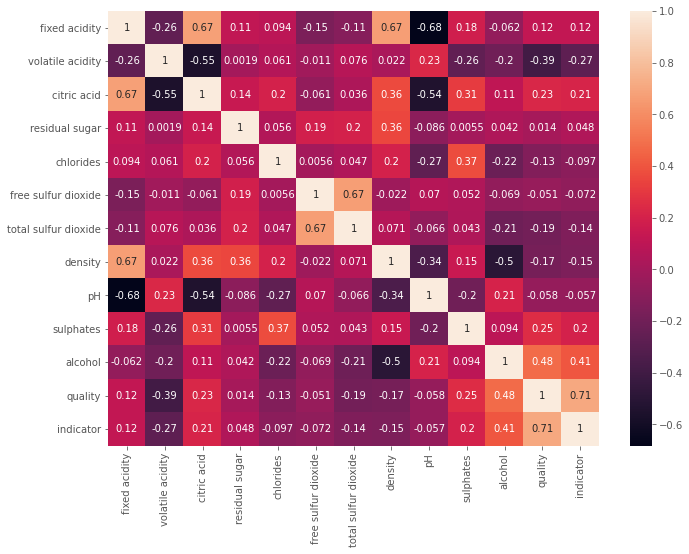

In [20]:
#visualizing correlations between the attributes
features = list(data.columns)

plt.style.use('ggplot')
corr = data[features].corr()
ax = plt.subplots(figsize=(11, 8))
sns.heatmap(corr, annot=True, annot_kws={"size": 10})
#We don't have very high correlated attributes. The highest correlation is between
#'fixed acidity' and 'density'. It's equal to 0.67

Classifing between qualities 3, 4, 5, 6, 7 e 8 - Random Forest Classifier

In [21]:
features = ['volatile acidity', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
            'density', 'sulphates', 'alcohol']

df = data[features]

X = df.iloc[:, :].values
y = data.iloc[:, 11].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

forest = RandomForestClassifier(criterion='gini', n_estimators=len(X_train), n_jobs=len(features)
                               -2, random_state=1)

forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

print(f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

0.7218547259210415
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.79      0.82      0.80       135
           6       0.73      0.77      0.75       142
           7       0.59      0.63      0.61        27
           8       0.00      0.00      0.00         3

    accuracy                           0.74       320
   macro avg       0.35      0.37      0.36       320
weighted avg       0.70      0.74      0.72       320



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifying between "good" and "not good" - Logistic Regression

In [27]:
#building the model
features = ['volatile acidity', 'chlorides', 'residual sugar', 'pH', 'free sulfur dioxide',
            'density', 'total sulfur dioxide', 'sulphates', 'alcohol']

df = data[features]

X = df.iloc[:, :].values
y = data.iloc[:, 13].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

logreg = LogisticRegression()

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

0.8921006635857329
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       290
           1       0.43      0.40      0.41        30

    accuracy                           0.89       320
   macro avg       0.68      0.67      0.68       320
weighted avg       0.89      0.89      0.89       320



In [28]:
print(confusion_matrix(y_test, y_pred))

[[274  16]
 [ 18  12]]


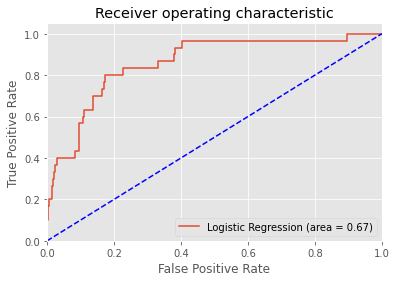

In [29]:
#ROC curve
plt.style.use('ggplot')
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()